# Geminga likelihood 

Analyze >10 years of Geminga data using three representations of the log likelihood functon:
* Gaussian
* 2D Gaussian
* Poisson

In [1]:
%matplotlib inline
from importlib import reload
import main, light_curve
import corner
import warnings
warnings.filterwarnings('error')

### Load all data, creating a BinnedWeights object

In [2]:
%%time 
data = main.Main('Geminga',  interval=1, mjd_range=None,        
                 weight_file='../data/geminga_weights.pkl')
bw=data.binned_weights()

Source Geminga at: (l,b)=(195.134,4.266); ROI radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
Binning: 3650 intervals of 1 days from 54683.00 to 58333.00
CPU times: user 1min 14s, sys: 21.1 s, total: 1min 36s
Wall time: 1min 54s


Now pass that to the LightCurve class, which represents the log likelihood function with various options

### Gaussian: fit flux with beta fixed to zero

Loaded 3562 / 3650 cells with exposure > 0.3 for light curve analysis
Fits using representation gauss: 3562 intervals
  columns: ['t', 'exp', 'counts', 'flux', 'sig_flux'] 
CPU times: user 2.45 s, sys: 6 ms, total: 2.45 s
Wall time: 2.62 s


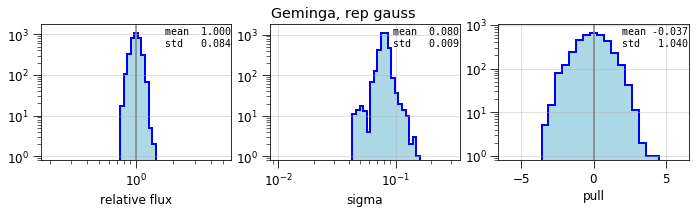

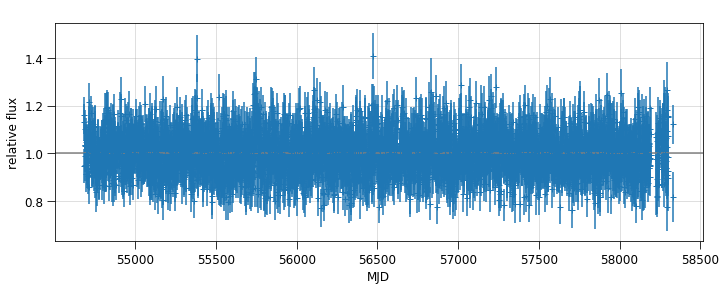

In [3]:
%time lc = light_curve.LightCurve(bw,rep='gauss') 
lc.fit_hists()
lc.flux_plot(title=' ')

####  Corner plot for this case

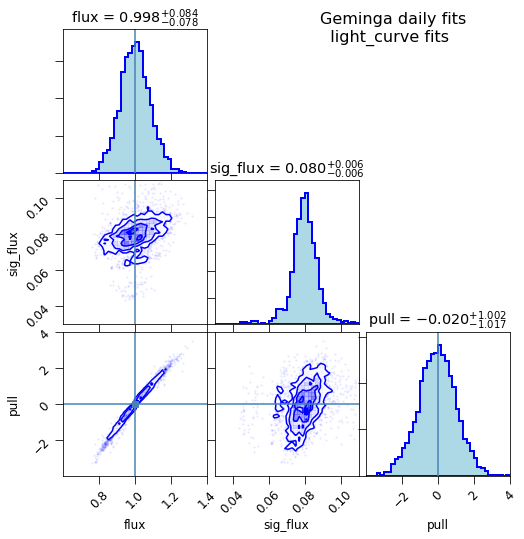

In [4]:
df = lc.fit_df
df.loc[:,'pull']=(df.flux-1)/df.sig_flux
corner.corner(df['flux sig_flux pull'.split()], bins=40, 
              range=[(0.6,1.4), (0.03,0.11),(-4,4)],
              color='blue',show_titles=True, truths=(1.0,None, 0), title_fmt='.3f', 
              hist_kwargs=dict(histtype='stepfilled',facecolor='lightblue', lw=2, edgecolor='blue', log=False));
plt.gcf().suptitle('Geminga daily fits\n  light_curve fits', x=0.6, ha='left', fontsize=16);

## 2-D Gaussian: fit both flux and beta

Loaded 3562 / 3650 cells with exposure > 0.3 for light curve analysis
Fits using representation gauss2d: 3562 intervals
  columns: ['t', 'exp', 'counts', 'flux', 'beta', 'sig_flux', 'sig_beta', 'corr'] 
CPU times: user 9.19 s, sys: 6.59 s, total: 15.8 s
Wall time: 15.6 s


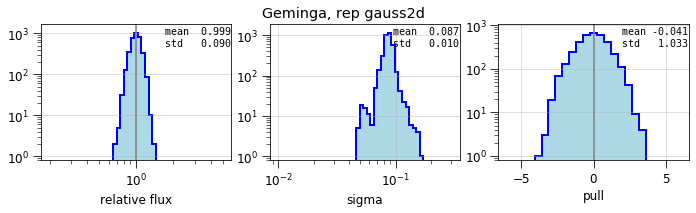

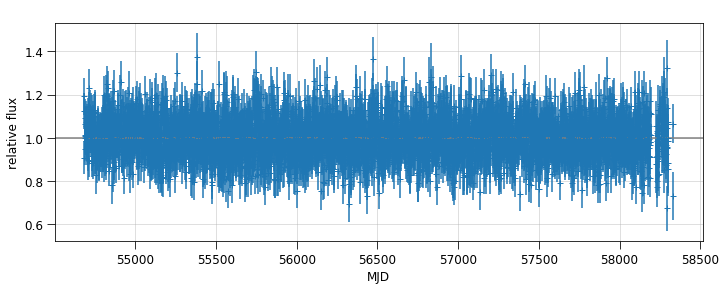

In [5]:
%time lc2d = light_curve.LightCurve(bw, rep='gauss2d') 
lc2d.fit_hists()
lc2d.flux_plot(title=' ')

#### For this case, a corner plot showing beta fit

In [6]:
corner.corner(df['flux beta sig_flux sig_beta'.split()], bins=40,
            range=[(0.7,1.3), (-.5,.5),(0.06, 0.12),(0.04,0.2)],
              color='blue',show_titles=True, truths=(1.0,0, None, None), title_fmt='.3f', 
              hist_kwargs=dict(histtype='stepfilled',facecolor='lightblue', lw=2, edgecolor='blue',));

KeyError: "['beta', 'sig_beta'] not in index"

## Poisson

In [ ]:
%time lc = light_curve.LightCurve(bw, rep='poisson') 
lc.fit_hists()
lc.flux_plot(title=' ')